In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Configuration
r0_values = [0.5, 0.9, 1, 1.1, 1.5]
num_generations = 20
num_runs = 50
simulations_per_run = 1000

In [4]:
# Store results
results = {
    'r0': [],
    'generation': [],
    'avg_infection_per_run': [],
    'avg_infections': [],
    'extinction_prob_per_run': [],
    'avg_extinction_prob': []
}

# Simulation

In [5]:
# Simulation function that returns both infections and extinction
def simulate_single_run(r0, generations, simulations):
    all_generations = np.zeros((simulations, generations))
    extinctions = 0

    for sim in range(simulations):
        # start with one infected individual
        infections = [1]
        extinct = False
        for gen in range(1, generations):
            new_infections = sum(np.random.poisson(r0) for _ in range(infections[-1]))
            infections.append(new_infections)
            if new_infections == 0:
                extinct = True
                break
        if len(infections) < generations:
            infections += [0] * (generations - len(infections))
        if extinct:
            extinctions += 1
        all_generations[sim] = infections

    mean_infections = np.mean(all_generations, axis=0)
    extinction_prob = extinctions / simulations
    return mean_infections, extinction_prob

In [6]:
# Main loop - create nested functions, try different distributions
for r0 in r0_values:
    print(f"Simulating for R₀ = {r0:.2f} \n")
    for gen in range(num_generations):
        run_averages = []
        run_extinctions = []

        for _ in range(num_runs):
            mean_infections, extinction_prob = simulate_single_run(r0, num_generations, simulations_per_run)
            run_averages.append(mean_infections[gen])
            run_extinctions.append(extinction_prob)

        # store simulated averages in a dataframe
        results['r0'].append(r0)
        results['generation'].append(gen)
        results['avg_infection_per_run'].append(run_averages)
        results['avg_infections'].append(np.mean(run_averages))
        results['extinction_prob_per_run'].append(run_extinctions)
        results['avg_extinction_prob'].append(np.mean(run_extinctions))

# Create DataFrame
df = pd.DataFrame(results)

# Show sample
print(df.head())
print(df.tail())

# df.to_csv("/content/drive/MyDrive/simulations.csv", index=False) # For saving the file to Drive
df.to_excel("simulations.xlsx", index = False) # For saving the file to local folder

Simulating for R₀ = 0.50 

Simulating for R₀ = 0.90 

Simulating for R₀ = 1.00 

Simulating for R₀ = 1.10 

Simulating for R₀ = 1.50 

    r0  generation                              avg_infection_per_run  \
0  0.5           0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
1  0.5           1  [0.495, 0.491, 0.494, 0.483, 0.536, 0.54, 0.51...   
2  0.5           2  [0.261, 0.215, 0.25, 0.208, 0.284, 0.238, 0.24...   
3  0.5           3  [0.116, 0.117, 0.114, 0.127, 0.135, 0.119, 0.1...   
4  0.5           4  [0.057, 0.052, 0.061, 0.055, 0.038, 0.066, 0.0...   

   avg_infections                            extinction_prob_per_run  \
0         1.00000  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
1         0.50354  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
2         0.25062  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
3         0.12284  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
4         0.06038  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, .

# Visualisation

In [7]:
# To save time on subsequent runs, this code block can be used to load results from a previously saved file
# df = pd.read_csv("/content/drive/MyDrive/simulations.csv") # For Colab import
file_path = "C:\\Users\\Atharva\\OneDrive\\Desktop\\My_Work\\MSc-I-Work\\Programming Languages\\Python\\simulations.xlsx"
df = pd.read_excel(file_path)
# Use the required file path as needed
print(df)

     r0  generation                              avg_infection_per_run  \
0   0.5           0  [np.float64(1.0), np.float64(1.0), np.float64(...   
1   0.5           1  [np.float64(0.495), np.float64(0.491), np.floa...   
2   0.5           2  [np.float64(0.261), np.float64(0.215), np.floa...   
3   0.5           3  [np.float64(0.116), np.float64(0.117), np.floa...   
4   0.5           4  [np.float64(0.057), np.float64(0.052), np.floa...   
..  ...         ...                                                ...   
95  1.5          15  [np.float64(442.246), np.float64(425.544), np....   
96  1.5          16  [np.float64(675.675), np.float64(657.012), np....   
97  1.5          17  [np.float64(910.638), np.float64(1009.48), np....   
98  1.5          18  [np.float64(1466.142), np.float64(1468.494), n...   
99  1.5          19  [np.float64(1987.852), np.float64(2044.418), n...   

    avg_infections                            extinction_prob_per_run  \
0          1.00000  [1.0, 1.0, 1.0, 1.

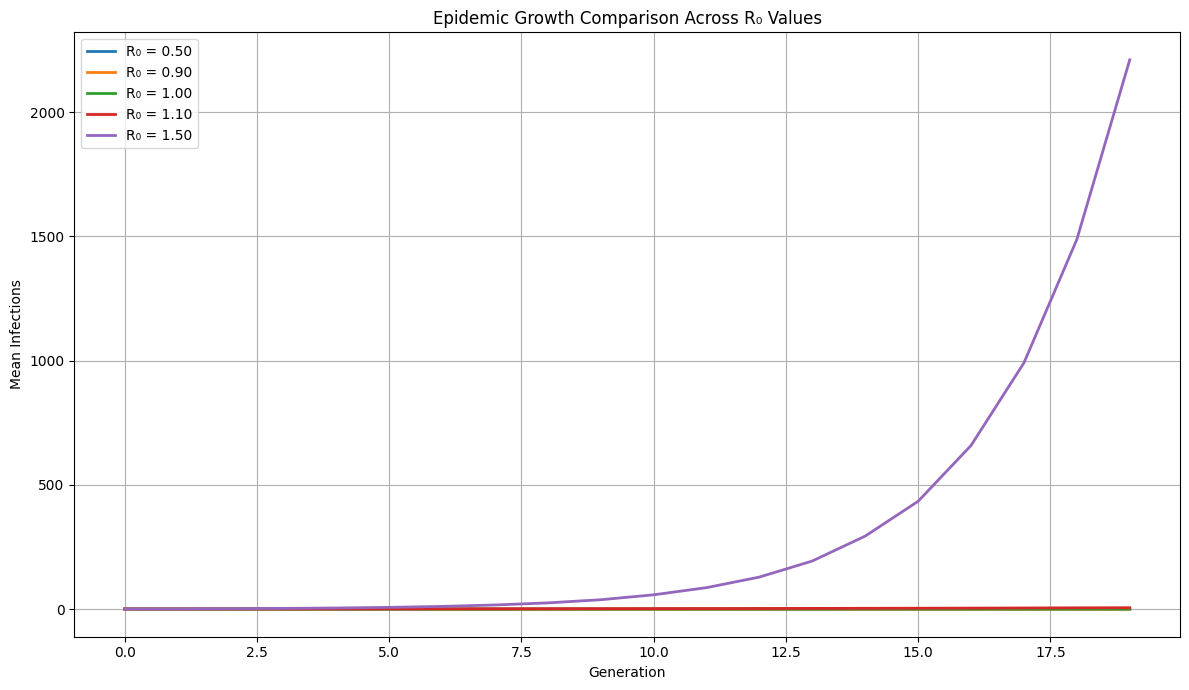

In [8]:
# R0 vs infections
def plot_r0_comparison(df):
    plt.figure(figsize=(12, 7))

    unique_r0s = sorted(df['r0'].unique())

    for r0 in unique_r0s:
        subset = df[df['r0'] == r0]
        generations = subset['generation'].tolist()
        means = subset['avg_infections'].tolist()
        plt.plot(generations, means, label=f"R₀ = {r0:.2f}", linewidth=2)

    plt.title("Epidemic Growth Comparison Across R₀ Values")
    plt.xlabel("Generation")
    plt.ylabel("Mean Infections")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_r0_comparison(df)

In [9]:
# interactive R0 vs infections
def plot_interactive_r0_comparison(df):
    fig = go.Figure()

    # Generate a color palette
    unique_r0s = sorted(df['r0'].unique())
    colors = px.colors.qualitative.Plotly

    for idx, r0 in enumerate(unique_r0s):
        subset = df[df['r0'] == r0]
        fig.add_trace(go.Scatter(
            x=subset['generation'],
            y=subset['avg_infections'],
            mode='lines+markers',
            name=f'R₀ = {r0:.2f}',
            line=dict(width=2, color=colors[idx % len(colors)]),
            marker=dict(size=5)
        ))

    fig.update_layout(
        title="Interactive Epidemic Growth Comparison Across R₀ Values",
        xaxis_title="Generation",
        yaxis_title="Mean Infections",
        legend_title="R₀ Values",
        template='plotly_white',
        hovermode='x unified'
    )

    fig.show()


plot_interactive_r0_comparison(df)


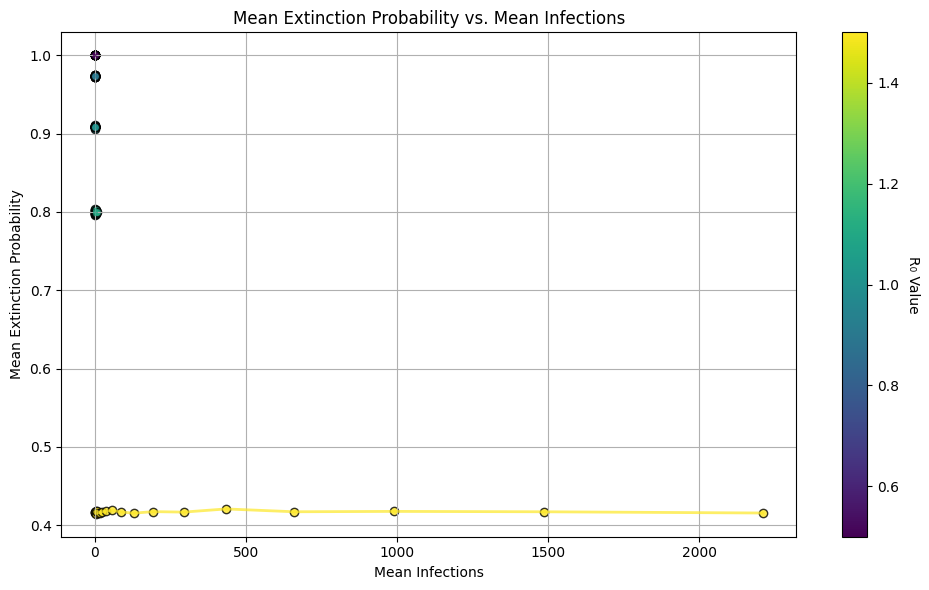

In [10]:
def plot_extinction_vs_infection(df):
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes

    # Unique R₀ values for grouping
    unique_r0s = df['r0'].unique()
    norm = plt.Normalize(df['r0'].min(), df['r0'].max())
    cmap = plt.cm.viridis

    for r0_value in unique_r0s:
        subset = df[df['r0'] == r0_value].sort_values(by='avg_infections')
        color = cmap(norm(r0_value))

        # Line connecting points of the same R₀
        ax.plot( # Plot on the axes object
            subset['avg_infections'],
            subset['avg_extinction_prob'],
            color=color,
            alpha=0.7,
            linewidth=2
        )

        # Scatter points on top
        ax.scatter( # Plot on the axes object
            subset['avg_infections'],
            subset['avg_extinction_prob'],
            color=color,
            edgecolor='k',
            label=f'R₀ = {r0_value:.2f}',
            alpha=0.8
        )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax)  # Add colorbar to the figure, specifying the axes
    cbar.set_label('R₀ Value', rotation=270, labelpad=15)

    ax.set_title('Mean Extinction Probability vs. Mean Infections') # Set title using the axes object
    ax.set_xlabel('Mean Infections') # Set xlabel using the axes object
    ax.set_ylabel('Mean Extinction Probability') # Set ylabel using the axes object
    ax.grid(True)
    plt.tight_layout()
    plt.show()

plot_extinction_vs_infection(df)

In [11]:
# interactive extinction vs infections
def plot_interactive_extinction_vs_infection(df):

    fig = px.scatter(
        df,
        x='avg_infections',  # Mean Infections
        y='avg_extinction_prob',  # Mean Extinction Probability
        color='r0',  # Color points based on R₀
        color_continuous_scale='viridis',
        labels={'avg_infections': 'Mean Infections',
                'avg_extinction_prob': 'Mean Extinction Probability',
                'r0': 'R₀ Value'},
        title='Mean Extinction Probability vs. Mean Infections',
        hover_data=['r0', 'avg_infections', 'avg_extinction_prob']  # Show additional info on hover
    )

    # Group by r0 value and add lines to connect the points of the same r0
    for r0_value in df['r0'].unique():
        # Filter the DataFrame for the current r0 value
        subset = df[df['r0'] == r0_value]

        # Add a line connecting the points of this r0
        # Normalize r0_value to the range 0-255 to get color index
        color_index = int(r0_value / max(df['r0']) * (len(px.colors.sequential.Viridis) - 1))

        fig.add_trace(go.Scatter(
            x=subset['avg_infections'],
            y=subset['avg_extinction_prob'],
            mode='lines+markers',
            name=f'R₀ = {r0_value:.2f}',  # Label for the line
            line=dict(color=px.colors.sequential.Viridis[color_index], dash='solid'),  # Line color based on r0 value
            marker=dict(size=8)  # Markers at the points
        ))

    # Update layout to adjust legend and colorbar positioning
    fig.update_layout(
        xaxis_title='Mean Infections',
        yaxis_title='Mean Extinction Probability',
        template='plotly_white',  # Optional: choose a theme
        coloraxis_colorbar=dict(
            title="R₀ Value",
            tickvals=[df['r0'].min(), df['r0'].max()],
            ticktext=[f"{df['r0'].min():.2f}", f"{df['r0'].max():.2f}"],
            tickmode='array',
            len=0.75,  # Adjust colorbar length
            x=1.05  # Move colorbar to the right to avoid overlap
        ),
        legend=dict(
            x=1,  # Adjust legend's position to avoid overlap with colorbar
            y=1.2,
            traceorder='normal',
            bgcolor='rgba(255, 255, 255, 0.5)',  # Optional: make legend background semi-transparent
            bordercolor='Black',
            borderwidth=1
        )
    )

    fig.show()

# Call the function
plot_interactive_extinction_vs_infection(df)
